In [1]:
import warnings
import pandas as pd
warnings.filterwarnings("ignore")
# show graphs in jupyter
%reload_ext autoreload
%autoreload 2
%matplotlib inline
# display all columns/rows and what's inside
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)

In [2]:
# https://towardsdatascience.com/multi-label-text-classification-5c505fdedca8#--responses
import matplotlib.pyplot as plt

import numpy
import json
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from bs4 import BeautifulSoup
import re
import csv
from itertools import cycle
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import *
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.adapt import MLkNN
from scipy.sparse import csr_matrix, lil_matrix
from sklearn.preprocessing import MultiLabelBinarizer
import pickle
from sklearn.svm import SVC
from skmultilearn.dataset import load_dataset
from skmultilearn.ext import Keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [3]:
# list of metrics
Evals = []

# 3. Multi-Label Classification


In [8]:
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
birds_train = pd.read_csv("birds-train.csv")
birds_test = pd.read_csv("birds-test.csv") 
# Preview the first 5 lines of the loaded data 
print(birds_train.shape,birds_test.shape)

# X_train, y_train
y_train = birds_train.iloc[:,-19:]
X_train = birds_train.iloc[:,:-19]

y_test = birds_test.iloc[:,-19:]
X_test = birds_test.iloc[:,:-19]

y_train = y_train.values
X_train = X_train.values

y_test = y_test.values
X_test = X_test.values

(322, 279) (323, 279)


## 3.1. Multiple Binary Classifications - (Binary Relevance)


### 3.1.1  BinaryRelevance MLP

In [9]:
def create_model_single_class(input_dim, output_dim):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=input_dim, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(output_dim, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

KERAS_PARAMS = dict(epochs=10, batch_size=100, verbose=0)
clf = BinaryRelevance(classifier=Keras(create_model_single_class, False, KERAS_PARAMS), require_dense=[True,True])
clf.fit(X_train, y_train)
result = clf.predict(X_test)

In [10]:
# accuracy   None, 'micro', 'macro', 'weighted', 'samples'
Accuracy = accuracy_score(y_test,result.toarray())
Micro_Precision = precision_score(y_test,result, average='micro')
Micro_Recall = recall_score(y_test,result, average='micro')
Micro_F1 = f1_score(y_test,result, average='micro')
Micro_Average_Prec = average_precision_score(y_test, result.toarray(), average='micro')
Macro_Precision = precision_score(y_test,result, average='macro')
Macro_Recall = recall_score(y_test,result, average='macro')
Macro_F1 = f1_score(y_test,result, average='macro')
Macro_Average_Prec = average_precision_score(y_test, result.toarray(), average='macro')
Samples_Average_Prec = average_precision_score(y_test, result.toarray(), average='samples')
Weighted_Average_Prec = average_precision_score(y_test, result.toarray(), average='weighted')
Hamming_loss = hamming_loss(y_test,result)
Ranking_loss = label_ranking_loss(y_test, result.toarray())
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
#fpr["micro"], tpr["micro"], _  = roc_curve(y_test.toarray(), result)
fpr, tpr, thresholds = roc_curve(y_test.ravel(), result.toarray().ravel())
Micro_Roc_auc = auc(fpr, tpr)
Coverage_error = coverage_error(y_test, result.toarray())
label_ranking_avg_prec_score = label_ranking_average_precision_score(y_test, result.toarray())
Jaccard_score = jaccard_score(y_test, result.toarray(), average='samples')
Jaccard_score_macro = jaccard_score(y_test, result.toarray(), average='macro')
print("BinaryReMLP Accuracy = ",Accuracy)
print("BinaryReMLP Micro_Precision = ",Micro_Precision)
print("BinaryReMLP Micro_Recall = ",Micro_Recall)
print("BinaryReMLP Micro_F1 = ",Micro_F1)
print("BinaryReMLP Micro_Average_Prec = ",Micro_Average_Prec)
print("BinaryReMLP Macro_Precision = ",Macro_Precision)
print("BinaryReMLP Macro_Recall = ",Macro_Recall)
print("BinaryReMLP Macro_F1 = ",Macro_F1)
print("BinaryReMLP Macro_Average_Prec = ",Macro_Average_Prec)
print("BinaryReMLP Samples_Average_Prec = ",Samples_Average_Prec)
print("BinaryReMLP Weighted_Average_Prec = ",Weighted_Average_Prec)
print("BinaryReMLP Hamming_loss = ",Hamming_loss)
print("BinaryReMLP Ranking_loss = ",Ranking_loss)
print("BinaryReMLP Micro_Roc_auc = ",Micro_Roc_auc)
print("BinaryReMLP Coverage_error = ",Coverage_error)
print("BinaryReMLP label_ranking_average_precision_score = ",label_ranking_avg_prec_score)
print("BinaryReMLP Jaccard_score = ",Jaccard_score)
print("BinaryReMLP Jaccard_score_macro = ",Jaccard_score_macro)
Eval1 = ['BinaryReMLP',Accuracy,Micro_Precision,Micro_Recall,Micro_F1,Micro_Average_Prec,
         Macro_Precision,Macro_Recall,Macro_F1,Macro_Average_Prec,Samples_Average_Prec,Weighted_Average_Prec,Hamming_loss,
         Ranking_loss,Micro_Roc_auc,Coverage_error,label_ranking_avg_prec_score,Jaccard_score,Jaccard_score_macro]
Evals.append(Eval1)

BinaryReMLP Accuracy =  0.058823529411764705
BinaryReMLP Micro_Precision =  0.05757575757575758
BinaryReMLP Micro_Recall =  0.12140575079872204
BinaryReMLP Micro_F1 =  0.07810894141829394
BinaryReMLP Micro_Average_Prec =  0.051800195910736854
BinaryReMLP Macro_Precision =  0.0588930284376066
BinaryReMLP Macro_Recall =  0.15550055207949948
BinaryReMLP Macro_F1 =  0.058343705953293544
BinaryReMLP Macro_Average_Prec =  0.05788179205407635
BinaryReMLP Samples_Average_Prec =  nan
BinaryReMLP Weighted_Average_Prec =  0.09160103316280453
BinaryReMLP Hamming_loss =  0.14616262017272283
BinaryReMLP Ranking_loss =  0.49006075598454035
BinaryReMLP Micro_Roc_auc =  0.5073031501246358
BinaryReMLP Coverage_error =  9.925696594427244
BinaryReMLP label_ranking_average_precision_score =  0.5291367932214448
BinaryReMLP Jaccard_score =  0.024028207774337805
BinaryReMLP Jaccard_score_macro =  0.03207616253934698


### 3.1.2  BinaryRelevance SVM

In [11]:
# initialize Binary Relevance multi-label classifier
# with an SVM classifier  # SVM in scikit only supports the X matrix in sparse representation
# Setup the classifier
classifier = BinaryRelevance(classifier=SVC(), require_dense=[False,True])
# Train
classifier.fit(X_train, y_train)
# Predict
y_pred = classifier.predict(X_test)

In [12]:
# accuracy   None, 'micro', 'macro', 'weighted', 'samples'
# In multilabel classification, this function computes subset_accuracy:
Accuracy = accuracy_score(y_test,y_pred)  
Micro_Precision = precision_score(y_test,y_pred, average='micro')
Micro_Recall = recall_score(y_test,y_pred, average='micro')
Micro_F1 = f1_score(y_test,y_pred, average='micro')
Micro_Average_Prec = average_precision_score(y_test, y_pred.toarray(), average='micro')
Macro_Precision = precision_score(y_test,y_pred, average='macro')
Macro_Recall = recall_score(y_test,y_pred, average='macro')
Macro_F1 = f1_score(y_test,y_pred, average='macro')
Macro_Average_Prec = average_precision_score(y_test, y_pred.toarray(), average='macro')
Samples_Average_Prec = average_precision_score(y_test, y_pred.toarray(), average='samples')
Weighted_Average_Prec = average_precision_score(y_test, y_pred.toarray(), average='weighted')
Hamming_loss = hamming_loss(y_test,y_pred)
Ranking_loss = label_ranking_loss(y_test, y_pred.toarray())
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
#fpr["micro"], tpr["micro"], _  = roc_curve(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test.ravel(), y_pred.toarray().ravel())
Micro_Roc_auc = auc(fpr, tpr)
Coverage_error = coverage_error(y_test, y_pred.toarray())
label_ranking_avg_prec_score = label_ranking_average_precision_score(y_test, y_pred.toarray())
Jaccard_score = jaccard_score(y_test, y_pred, average='samples')
Jaccard_score_macro = jaccard_score(y_test, y_pred, average='macro')
print("BinaryReSVC Accuracy = ",Accuracy)
print("BinaryReSVC Micro_Precision = ",Micro_Precision)
print("BinaryReSVC Micro_Recall = ",Micro_Recall)
print("BinaryReSVC Micro_F1 = ",Micro_F1)
print("BinaryReSVC Micro_Average_Prec = ",Micro_Average_Prec)
print("BinaryReSVC Macro_Precision = ",Macro_Precision)
print("BinaryReSVC Macro_Recall = ",Macro_Recall)
print("BinaryReSVC Macro_F1 = ",Macro_F1)
print("BinaryReSVC Macro_Average_Prec = ",Macro_Average_Prec)
print("BinaryReSVC Samples_Average_Prec = ",Samples_Average_Prec)
print("BinaryReSVC Weighted_Average_Prec = ",Weighted_Average_Prec)
print("BinaryReSVC Hamming_loss = ",Hamming_loss)
print("BinaryReSVC Ranking_loss = ",Ranking_loss)
print("BinaryReSVC Micro_Roc_auc = ",Micro_Roc_auc)
print("BinaryReSVC Coverage_error = ",Coverage_error)
print("BinaryReSVC label_ranking_average_precision_score = ",label_ranking_avg_prec_score)
print("BinaryReSVC Jaccard_score = ",Jaccard_score)
print("BinaryReSVC Jaccard_score_macro = ",Jaccard_score_macro)
Eval2 = ['BinaryReSVC',Accuracy,Micro_Precision,Micro_Recall,Micro_F1,Micro_Average_Prec,
         Macro_Precision,Macro_Recall,Macro_F1,Macro_Average_Prec,Samples_Average_Prec,Weighted_Average_Prec,Hamming_loss,
         Ranking_loss,Micro_Roc_auc,Coverage_error,label_ranking_avg_prec_score,Jaccard_score,Jaccard_score_macro]
Evals.append(Eval2)

BinaryReSVC Accuracy =  0.4674922600619195
BinaryReSVC Micro_Precision =  0.0
BinaryReSVC Micro_Recall =  0.0
BinaryReSVC Micro_F1 =  0.0
BinaryReSVC Micro_Average_Prec =  0.05100211829884308
BinaryReSVC Macro_Precision =  0.0
BinaryReSVC Macro_Recall =  0.0
BinaryReSVC Macro_F1 =  0.0
BinaryReSVC Macro_Average_Prec =  0.05100211829884309
BinaryReSVC Samples_Average_Prec =  nan
BinaryReSVC Weighted_Average_Prec =  0.08001068259824529
BinaryReSVC Hamming_loss =  0.05100211829884308
BinaryReSVC Ranking_loss =  0.5325077399380805
BinaryReSVC Micro_Roc_auc =  0.5
BinaryReSVC Coverage_error =  10.117647058823529
BinaryReSVC label_ranking_average_precision_score =  0.5184943783607637
BinaryReSVC Jaccard_score =  0.0
BinaryReSVC Jaccard_score_macro =  0.0


### 3.1.3  BinaryRelevance GaussianNB

In [13]:
#Binary Relevance GaussianNB
BinaryReGaussianNB = BinaryRelevance(GaussianNB())
BinaryReGaussianNB.fit(X_train,y_train)
br_predictions = BinaryReGaussianNB.predict(X_test)

In [14]:
# accuracy   None, 'micro', 'macro', 'weighted', 'samples'
Accuracy = accuracy_score(y_test,br_predictions.toarray())
Micro_Precision = precision_score(y_test,br_predictions, average='micro')
Micro_Recall = recall_score(y_test,br_predictions, average='micro')
Micro_F1 = f1_score(y_test,br_predictions, average='micro')
Micro_Average_Prec = average_precision_score(y_test, br_predictions.toarray(), average='micro')
Macro_Precision = precision_score(y_test,br_predictions, average='macro')
Macro_Recall = recall_score(y_test,br_predictions, average='macro')
Macro_F1 = f1_score(y_test,br_predictions, average='macro')
Macro_Average_Prec = average_precision_score(y_test, br_predictions.toarray(), average='macro')
Samples_Average_Prec = average_precision_score(y_test, br_predictions.toarray(), average='samples')
Weighted_Average_Prec = average_precision_score(y_test, br_predictions.toarray(), average='weighted')
Hamming_loss = hamming_loss(y_test,br_predictions)
Ranking_loss = label_ranking_loss(y_test, br_predictions.toarray())
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
#fpr["micro"], tpr["micro"], _  = roc_curve(y_test.toarray(), br_predictions)
fpr, tpr, thresholds = roc_curve(y_test.ravel(), br_predictions.toarray().ravel())
Micro_Roc_auc = auc(fpr, tpr)
Coverage_error = coverage_error(y_test, br_predictions.toarray())
label_ranking_avg_prec_score = label_ranking_average_precision_score(y_test, br_predictions.toarray())
Jaccard_score = jaccard_score(y_test, br_predictions, average='samples')
Jaccard_score_macro = jaccard_score(y_test, br_predictions, average='macro')
print("BinaryReGaussianNB Accuracy = ",Accuracy)
print("BinaryReGaussianNB Micro_Precision = ",Micro_Precision)
print("BinaryReGaussianNB Micro_Recall = ",Micro_Recall)
print("BinaryReGaussianNB Micro_F1 = ",Micro_F1)
print("BinaryReGaussianNB Micro_Average_Prec = ",Micro_Average_Prec)
print("BinaryReGaussianNB Macro_Precision = ",Macro_Precision)
print("BinaryReGaussianNB Macro_Recall = ",Macro_Recall)
print("BinaryReGaussianNB Macro_F1 = ",Macro_F1)
print("BinaryReGaussianNB Macro_Average_Prec = ",Macro_Average_Prec)
print("BinaryReGaussianNB Samples_Average_Prec = ",Samples_Average_Prec)
print("BinaryReGaussianNB Weighted_Average_Prec = ",Weighted_Average_Prec)
print("BinaryReGaussianNB Hamming_loss = ",Hamming_loss)
print("BinaryReGaussianNB Ranking_loss = ",Ranking_loss)
print("BinaryReGaussianNB Micro_Roc_auc = ",Micro_Roc_auc)
print("BinaryReGaussianNB Coverage_error = ",Coverage_error)
print("BinaryReGaussianNB label_ranking_average_precision_score = ",label_ranking_avg_prec_score)
print("BinaryReGaussianNB Jaccard_score = ",Jaccard_score)
print("BinaryReGaussianNB Jaccard_score_macro = ",Jaccard_score_macro)
Eval3 = ['BinaryReGaussianNB',Accuracy,Micro_Precision,Micro_Recall,Micro_F1,Micro_Average_Prec,
         Macro_Precision,Macro_Recall,Macro_F1,Macro_Average_Prec,Samples_Average_Prec,Weighted_Average_Prec,Hamming_loss,
         Ranking_loss,Micro_Roc_auc,Coverage_error,label_ranking_avg_prec_score,Jaccard_score,Jaccard_score_macro]
Evals.append(Eval3)

BinaryReGaussianNB Accuracy =  0.07430340557275542
BinaryReGaussianNB Micro_Precision =  0.1183252427184466
BinaryReGaussianNB Micro_Recall =  0.6230031948881789
BinaryReGaussianNB Micro_F1 =  0.1988781234064253
BinaryReGaussianNB Micro_Average_Prec =  0.09294463990211044
BinaryReGaussianNB Macro_Precision =  0.11863759031879019
BinaryReGaussianNB Macro_Recall =  0.5401641430518042
BinaryReGaussianNB Macro_F1 =  0.17969674054989127
BinaryReGaussianNB Macro_Average_Prec =  0.08923743350488714
BinaryReGaussianNB Samples_Average_Prec =  nan
BinaryReGaussianNB Weighted_Average_Prec =  0.13309199449610287
BinaryReGaussianNB Hamming_loss =  0.2559882678833306
BinaryReGaussianNB Ranking_loss =  0.34427772140848084
BinaryReGaussianNB Micro_Roc_auc =  0.6867591523891444
BinaryReGaussianNB Coverage_error =  7.544891640866873
BinaryReGaussianNB label_ranking_average_precision_score =  0.5641584974178264
BinaryReGaussianNB Jaccard_score =  0.0842049247622003
BinaryReGaussianNB Jaccard_score_macro 

## 3.2. Label Powerset


In [15]:
## initialize label powerset multi-label classifier
lp_classifier = LabelPowerset(LogisticRegression())
lp_classifier.fit(X_train, y_train)
lp_predictions = lp_classifier.predict(X_test)

In [16]:
# accuracy   None, 'micro', 'macro', 'weighted', 'samples'
Accuracy = accuracy_score(y_test,lp_predictions.toarray())
Micro_Precision = precision_score(y_test,lp_predictions, average='micro')
Micro_Recall = recall_score(y_test,lp_predictions, average='micro')
Micro_F1 = f1_score(y_test,lp_predictions, average='micro')
Micro_Average_Prec = average_precision_score(y_test, lp_predictions.toarray(), average='micro')
Macro_Precision = precision_score(y_test,lp_predictions, average='macro')
Macro_Recall = recall_score(y_test,lp_predictions, average='macro')
Macro_F1 = f1_score(y_test,lp_predictions, average='macro')
Macro_Average_Prec = average_precision_score(y_test, lp_predictions.toarray(), average='macro')
Samples_Average_Prec = average_precision_score(y_test, lp_predictions.toarray(), average='samples')
Weighted_Average_Prec = average_precision_score(y_test, lp_predictions.toarray(), average='weighted')
Hamming_loss = hamming_loss(y_test,lp_predictions)
Ranking_loss = label_ranking_loss(y_test, lp_predictions.toarray())
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
#fpr["micro"], tpr["micro"], _  = roc_curve(y_test, lp_predictions)
fpr, tpr, thresholds = roc_curve(y_test.ravel(), lp_predictions.toarray().ravel())
Micro_Roc_auc = auc(fpr, tpr)
Coverage_error = coverage_error(y_test, lp_predictions.toarray())
label_ranking_avg_prec_score = label_ranking_average_precision_score(y_test, lp_predictions.toarray())
Jaccard_score = jaccard_score(y_test, lp_predictions, average='samples')
Jaccard_score_macro = jaccard_score(y_test, lp_predictions, average='macro')
print("LabelPowersetLogisticRegression Accuracy = ",Accuracy)
print("LabelPowersetLogisticRegression Micro_Precision = ",Micro_Precision)
print("LabelPowersetLogisticRegression Micro_Recall = ",Micro_Recall)
print("LabelPowersetLogisticRegression Micro_F1 = ",Micro_F1)
print("LabelPowersetLogisticRegression Micro_Average_Prec = ",Micro_Average_Prec)
print("LabelPowersetLogisticRegression Macro_Precision = ",Macro_Precision)
print("LabelPowersetLogisticRegression Macro_Recall = ",Macro_Recall)
print("LabelPowersetLogisticRegression Macro_F1 = ",Macro_F1)
print("LabelPowersetLogisticRegression Macro_Average_Prec = ",Macro_Average_Prec)
print("LabelPowersetLogisticRegression Samples_Average_Prec = ",Samples_Average_Prec)
print("LabelPowersetLogisticRegression Weighted_Average_Prec = ",Weighted_Average_Prec)
print("LabelPowersetLogisticRegression Hamming_loss = ",Hamming_loss)
print("LabelPowersetLogisticRegression Ranking_loss = ",Ranking_loss)
print("LabelPowersetLogisticRegression Micro_Roc_auc = ",Micro_Roc_auc)
print("LabelPowersetLogisticRegression Coverage_error = ",Coverage_error)
print("LabelPowersetLogisticRegression label_ranking_average_precision_score = ",label_ranking_avg_prec_score)
print("LabelPowersetLogisticRegression Jaccard_score = ",Jaccard_score)
print("LabelPowersetLogisticRegression Jaccard_score_macro = ",Jaccard_score_macro)
Eval4 = ['LabelPowersetLogisticRegression',Accuracy,Micro_Precision,Micro_Recall,Micro_F1,Micro_Average_Prec,
         Macro_Precision,Macro_Recall,Macro_F1,Macro_Average_Prec,Samples_Average_Prec,Weighted_Average_Prec,Hamming_loss,
         Ranking_loss,Micro_Roc_auc,Coverage_error,label_ranking_avg_prec_score,Jaccard_score,Jaccard_score_macro]
Evals.append(Eval4)

LabelPowersetLogisticRegression Accuracy =  0.46439628482972134
LabelPowersetLogisticRegression Micro_Precision =  0.34798534798534797
LabelPowersetLogisticRegression Micro_Recall =  0.3035143769968051
LabelPowersetLogisticRegression Micro_F1 =  0.32423208191126285
LabelPowersetLogisticRegression Micro_Average_Prec =  0.14114079823564168
LabelPowersetLogisticRegression Macro_Precision =  0.28438397951037414
LabelPowersetLogisticRegression Macro_Recall =  0.256082385637968
LabelPowersetLogisticRegression Macro_F1 =  0.2541481980710937
LabelPowersetLogisticRegression Macro_Average_Prec =  0.13202777786496164
LabelPowersetLogisticRegression Samples_Average_Prec =  nan
LabelPowersetLogisticRegression Weighted_Average_Prec =  0.19058203778998306
LabelPowersetLogisticRegression Hamming_loss =  0.0645266416816034
LabelPowersetLogisticRegression Ranking_loss =  0.3837367712823003
LabelPowersetLogisticRegression Micro_Roc_auc =  0.6364755950918092
LabelPowersetLogisticRegression Coverage_error 

# 3.3. Adapted Algorithm


In [17]:
#MLkNN
# Adapted Algorithm¶
# http://scikit.ml/api/api/skmultilearn.adapt.html#skmultilearn.adapt.MLkNN
ml_classifier = MLkNN(k=10)
# to prevent errors when handling sparse matrices.
X_train = lil_matrix(X_train).toarray()
y_train = lil_matrix(y_train).toarray()
X_test = lil_matrix(X_test).toarray()
ml_classifier.fit(X_train, y_train)
# predict
ml_predictions = ml_classifier.predict(X_test)

In [18]:
# accuracy   None, 'micro', 'macro', 'weighted', 'samples'
Accuracy = accuracy_score(y_test,ml_predictions.toarray())
Micro_Precision = precision_score(y_test,ml_predictions, average='micro')
Micro_Recall = recall_score(y_test,ml_predictions, average='micro')
Micro_F1 = f1_score(y_test,ml_predictions, average='micro')
Micro_Average_Prec = average_precision_score(y_test, ml_predictions.toarray(), average='micro')
Macro_Precision = precision_score(y_test,ml_predictions, average='macro')
Macro_Recall = recall_score(y_test,ml_predictions, average='macro')
Macro_F1 = f1_score(y_test,ml_predictions, average='macro')
Macro_Average_Prec = average_precision_score(y_test, ml_predictions.toarray(), average='macro')
Samples_Average_Prec = average_precision_score(y_test, ml_predictions.toarray(), average='samples')
Weighted_Average_Prec = average_precision_score(y_test, ml_predictions.toarray(), average='weighted')
Hamming_loss = hamming_loss(y_test,ml_predictions)
Ranking_loss = label_ranking_loss(y_test, ml_predictions.toarray())
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
#fpr["micro"], tpr["micro"], _  = roc_curve(y_test, ml_predictions)
fpr, tpr, thresholds = roc_curve(y_test.ravel(), ml_predictions.toarray().ravel())
Micro_Roc_auc = auc(fpr, tpr)
Coverage_error = coverage_error(y_test, ml_predictions.toarray())
label_ranking_avg_prec_score = label_ranking_average_precision_score(y_test, ml_predictions.toarray())
Jaccard_score = jaccard_score(y_test, ml_predictions, average='samples')
Jaccard_score_macro = jaccard_score(y_test, ml_predictions, average='macro')
print("MLkNN Accuracy = ",Accuracy)
print("MLkNN Micro_Precision = ",Micro_Precision)
print("MLkNN Micro_Recall = ",Micro_Recall)
print("MLkNN Micro_F1 = ",Micro_F1)
print("MLkNN Micro_Average_Prec = ",Micro_Average_Prec)
print("MLkNN Macro_Precision = ",Macro_Precision)
print("MLkNN Macro_Recall = ",Macro_Recall)
print("MLkNN Macro_F1 = ",Macro_F1)
print("MLkNN Macro_Average_Prec = ",Macro_Average_Prec)
print("MLkNN Samples_Average_Prec = ",Samples_Average_Prec)
print("MLkNN Weighted_Average_Prec = ",Weighted_Average_Prec)
print("MLkNN Hamming_loss = ",Hamming_loss)
print("MLkNN Ranking_loss = ",Ranking_loss)
print("MLkNN Micro_Roc_auc = ",Micro_Roc_auc)
print("MLkNN Coverage_error = ",Coverage_error)
print("MLkNN label_ranking_average_precision_score = ",label_ranking_avg_prec_score)
print("MLkNN Jaccard_score = ",Jaccard_score)
print("MLkNN Jaccard_score_macro = ",Jaccard_score_macro)
Eval5 = ['MLkNN',Accuracy,Micro_Precision,Micro_Recall,Micro_F1,Micro_Average_Prec,
         Macro_Precision,Macro_Recall,Macro_F1,Macro_Average_Prec,Samples_Average_Prec,Weighted_Average_Prec,Hamming_loss,
         Ranking_loss,Micro_Roc_auc,Coverage_error,label_ranking_avg_prec_score,Jaccard_score,Jaccard_score_macro]
Evals.append(Eval5)

MLkNN Accuracy =  0.4674922600619195
MLkNN Micro_Precision =  0.20689655172413793
MLkNN Micro_Recall =  0.019169329073482427
MLkNN Micro_F1 =  0.03508771929824562
MLkNN Micro_Average_Prec =  0.05399050999389666
MLkNN Macro_Precision =  0.02777777777777778
MLkNN Macro_Recall =  0.008852901484480431
MLkNN Macro_F1 =  0.012863374406979336
MLkNN Macro_Average_Prec =  0.052425101678808705
MLkNN Samples_Average_Prec =  nan
MLkNN Weighted_Average_Prec =  0.08307066450816637
MLkNN Hamming_loss =  0.05377220140133616
MLkNN Ranking_loss =  0.5250257997936016
MLkNN Micro_Roc_auc =  0.5076100766246533
MLkNN Coverage_error =  10.117647058823529
MLkNN label_ranking_average_precision_score =  0.5249986421161273
MLkNN Jaccard_score =  0.007481940144478844
MLkNN Jaccard_score_macro =  0.006940427993059572


## 3.4. Classifier Chains


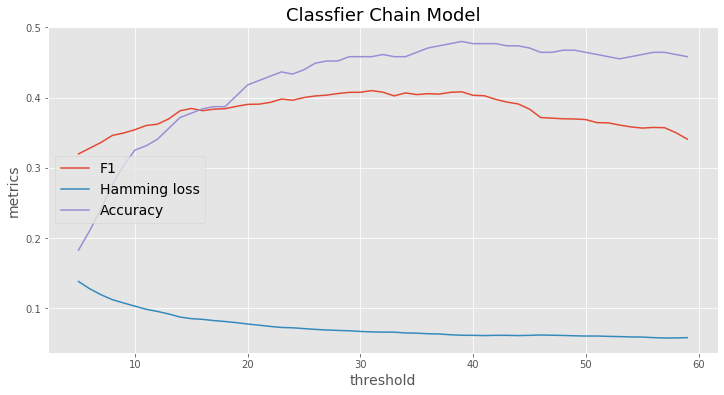

In [19]:
#for the next classifier we need to remove from y-train, y-test categories which equal 0 for all train samples
cc_classifier = ClassifierChain(LogisticRegression(solver='warn'))
cc_classifier.fit(X_train, y_train)
cc_predictions_proba = cc_classifier.predict_proba(X_test)
#for plotting metrics as a function of threashold
th = []
f = []
ham = []
ac = []
for t in range (5,60): # threshold value
    y_pred_new = (cc_predictions_proba >= t/100).astype(int)
#     print("t =" ,t/100)
#     print("Accuracy = ",accuracy_score(y_test,y_pred_new))
#     print("F1 = ",f1_score(y_test,y_pred_new, average="micro"))
#     print("Hamming loss = ",hamming_loss(y_test,y_pred_new))
    th.append(t)
    ac.append(accuracy_score(y_test,y_pred_new))
    f.append(f1_score(y_test,y_pred_new, average="micro"))
    ham.append(hamming_loss(y_test,y_pred_new))
plt.rcParams["figure.figsize"] = (12,6)
with plt.style.context('ggplot'):
    plt.plot(th, f)
    plt.plot(th, ham)
    plt.plot(th, ac)
    plt.legend(['F1', 'Hamming loss', 'Accuracy'], loc='center left', fontsize = 14)
    plt.ylabel("metrics", fontsize = 14)
    plt.xlabel("threshold", fontsize = 14)
    plt.title("Classfier Chain Model", fontsize = 18)
plt.show()

In [20]:
# using classifier chains
# initialize classifier chains multi-label classifier
classifier = ClassifierChain(LogisticRegression())
# Training logistic regression model on train data
classifier.fit(X_train, y_train)
# predict
predictions = classifier.predict(X_test)

In [21]:
# accuracy   None, 'micro', 'macro', 'weighted', 'samples'
Accuracy = accuracy_score(y_test,predictions.toarray())
Micro_Precision = precision_score(y_test,predictions, average='micro')
Micro_Recall = recall_score(y_test,predictions, average='micro')
Micro_F1 = f1_score(y_test,predictions, average='micro')
Micro_Average_Prec = average_precision_score(y_test, predictions.toarray(), average='micro')
Macro_Precision = precision_score(y_test,predictions, average='macro')
Macro_Recall = recall_score(y_test,predictions, average='macro')
Macro_F1 = f1_score(y_test,predictions, average='macro')
Macro_Average_Prec = average_precision_score(y_test, predictions.toarray(), average='macro')
Samples_Average_Prec = average_precision_score(y_test, predictions.toarray(), average='samples')
Weighted_Average_Prec = average_precision_score(y_test, predictions.toarray(), average='weighted')
Hamming_loss = hamming_loss(y_test,predictions)
Ranking_loss = label_ranking_loss(y_test, predictions.toarray())
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
#fpr["micro"], tpr["micro"], _  = roc_curve(y_test, predictions)
fpr, tpr, thresholds = roc_curve(y_test.ravel(), predictions.toarray().ravel())
Micro_Roc_auc = auc(fpr, tpr)
Coverage_error = coverage_error(y_test, predictions.toarray())
label_ranking_avg_prec_score = label_ranking_average_precision_score(y_test, predictions.toarray())
Jaccard_score = jaccard_score(y_test, predictions, average='samples')
Jaccard_score_macro = jaccard_score(y_test, predictions, average='macro')
print("ClassifierChain Accuracy = ",Accuracy)
print("ClassifierChain Micro_Precision = ",Micro_Precision)
print("ClassifierChain Micro_Recall = ",Micro_Recall)
print("ClassifierChain Micro_F1 = ",Micro_F1)
print("ClassifierChain Micro_Average_Prec = ",Micro_Average_Prec)
print("ClassifierChain Macro_Precision = ",Macro_Precision)
print("ClassifierChain Macro_Recall = ",Macro_Recall)
print("ClassifierChain Macro_F1 = ",Macro_F1)
print("ClassifierChain Macro_Average_Prec = ",Macro_Average_Prec)
print("ClassifierChain Samples_Average_Prec = ",Samples_Average_Prec)
print("ClassifierChain Weighted_Average_Prec = ",Weighted_Average_Prec)
print("ClassifierChain Hamming_loss = ",Hamming_loss)
print("ClassifierChain Ranking_loss = ",Ranking_loss)
print("ClassifierChain Micro_Roc_auc = ",Micro_Roc_auc)
print("ClassifierChain Coverage_error = ",Coverage_error)
print("ClassifierChain label_ranking_average_precision_score = ",label_ranking_avg_prec_score)
print("ClassifierChain Jaccard_score = ",Jaccard_score)
print("ClassifierChain Jaccard_score_macro = ",Jaccard_score_macro)
Eval6 = ['ClassifierChain',Accuracy,Micro_Precision,Micro_Recall,Micro_F1,Micro_Average_Prec,
         Macro_Precision,Macro_Recall,Macro_F1,Macro_Average_Prec,Samples_Average_Prec,Weighted_Average_Prec,Hamming_loss,
         Ranking_loss,Micro_Roc_auc,Coverage_error,label_ranking_avg_prec_score,Jaccard_score,Jaccard_score_macro]
Evals.append(Eval6)

ClassifierChain Accuracy =  0.46439628482972134
ClassifierChain Micro_Precision =  0.3956043956043956
ClassifierChain Micro_Recall =  0.3450479233226837
ClassifierChain Micro_F1 =  0.36860068259385664
ClassifierChain Micro_Average_Prec =  0.16990641845539153
ClassifierChain Macro_Precision =  0.2612398663563728
ClassifierChain Macro_Recall =  0.22548558121859946
ClassifierChain Macro_F1 =  0.2376521409863136
ClassifierChain Macro_Average_Prec =  0.13166558724405317
ClassifierChain Samples_Average_Prec =  nan
ClassifierChain Weighted_Average_Prec =  0.2262552535206073
ClassifierChain Hamming_loss =  0.06029004399543751
ClassifierChain Ranking_loss =  0.3774595803233574
ClassifierChain Micro_Roc_auc =  0.6583584396833199
ClassifierChain Coverage_error =  8.535603715170279
ClassifierChain label_ranking_average_precision_score =  0.6200384216475148
ClassifierChain Jaccard_score =  0.1241314069487444
ClassifierChain Jaccard_score_macro =  0.15135516702948024


# 3.5. Multiple Binary Classifications - (One Vs Rest Classifier)


In [22]:
# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),])
# Training logistic regression model on train data
LogReg_pipeline.fit(X_train,y_train )
# calculating test accuracy
Logprediction = LogReg_pipeline.predict(X_test)

In [23]:
# accuracy   None, 'micro', 'macro', 'weighted', 'samples'
Accuracy = accuracy_score(y_test,Logprediction)
Micro_Precision = precision_score(y_test,Logprediction, average='micro')
Micro_Recall = recall_score(y_test,Logprediction, average='micro')
Micro_F1 = f1_score(y_test,Logprediction, average='micro')
Micro_Average_Prec = average_precision_score(y_test, Logprediction, average='micro')
Macro_Precision = precision_score(y_test,Logprediction, average='macro')
Macro_Recall = recall_score(y_test,Logprediction, average='macro')
Macro_F1 = f1_score(y_test,Logprediction, average='macro')
Macro_Average_Prec = average_precision_score(y_test, Logprediction, average='macro')
Samples_Average_Prec = average_precision_score(y_test, Logprediction, average='samples')
Weighted_Average_Prec = average_precision_score(y_test, Logprediction, average='weighted')
Hamming_loss = hamming_loss(y_test,Logprediction)
Ranking_loss = label_ranking_loss(y_test, Logprediction)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), Logprediction.ravel())
Micro_Roc_auc = auc(fpr["micro"], tpr["micro"])
Coverage_error = coverage_error(y_test, Logprediction)
label_ranking_avg_prec_score = label_ranking_average_precision_score(y_test, Logprediction)
Jaccard_score = jaccard_score(y_test, Logprediction, average='samples')
Jaccard_score_macro = jaccard_score(y_test, Logprediction, average='macro')
print("OneVsRestClassifier_LogisticRegression Accuracy = ",Accuracy)
print("OneVsRestClassifier_LogisticRegression Micro_Precision = ",Micro_Precision)
print("OneVsRestClassifier_LogisticRegression Micro_Recall = ",Micro_Recall)
print("OneVsRestClassifier_LogisticRegression Micro_F1 = ",Micro_F1)
print("OneVsRestClassifier_LogisticRegression Micro_Average_Prec = ",Micro_Average_Prec)
print("OneVsRestClassifier_LogisticRegression Macro_Precision = ",Macro_Precision)
print("OneVsRestClassifier_LogisticRegression Macro_Recall = ",Macro_Recall)
print("OneVsRestClassifier_LogisticRegression Macro_F1 = ",Macro_F1)
print("OneVsRestClassifier_LogisticRegression Macro_Average_Prec = ",Macro_Average_Prec)
print("OneVsRestClassifier_LogisticRegression Samples_Average_Prec = ",Samples_Average_Prec)
print("OneVsRestClassifier_LogisticRegression Weighted_Average_Prec = ",Weighted_Average_Prec)
print("OneVsRestClassifier_LogisticRegression Hamming_loss = ",Hamming_loss)
print("OneVsRestClassifier_LogisticRegression Ranking_loss = ",Ranking_loss)
print("OneVsRestClassifier_LogisticRegression Micro_Roc_auc = ",Micro_Roc_auc)
print("OneVsRestClassifier_LogisticRegression Coverage_error = ",Coverage_error)
print("OneVsRestClassifier_LogisticRegression label_ranking_average_precision_score = ",label_ranking_avg_prec_score)
print("OneVsRestClassifier_LogisticRegression Jaccard_score = ",Jaccard_score)
print("OneVsRestClassifier_LogisticRegression Jaccard_score_macro = ",Jaccard_score_macro)
Eval7 = ['OneVsRestClassifier_LogisticRegression',Accuracy,Micro_Precision,Micro_Recall,Micro_F1,Micro_Average_Prec,
         Macro_Precision,Macro_Recall,Macro_F1,Macro_Average_Prec,Samples_Average_Prec,Weighted_Average_Prec,Hamming_loss,
         Ranking_loss,Micro_Roc_auc,Coverage_error,label_ranking_avg_prec_score,Jaccard_score,Jaccard_score_macro]
Evals.append(Eval7)

OneVsRestClassifier_LogisticRegression Accuracy =  0.4674922600619195
OneVsRestClassifier_LogisticRegression Micro_Precision =  0.40625
OneVsRestClassifier_LogisticRegression Micro_Recall =  0.04153354632587859
OneVsRestClassifier_LogisticRegression Micro_F1 =  0.07536231884057971
OneVsRestClassifier_LogisticRegression Micro_Average_Prec =  0.06575682265064832
OneVsRestClassifier_LogisticRegression Macro_Precision =  0.1796157059314954
OneVsRestClassifier_LogisticRegression Macro_Recall =  0.027787633165207534
OneVsRestClassifier_LogisticRegression Macro_F1 =  0.04602645536543733
OneVsRestClassifier_LogisticRegression Macro_Average_Prec =  0.06378159648168362
OneVsRestClassifier_LogisticRegression Samples_Average_Prec =  nan
OneVsRestClassifier_LogisticRegression Weighted_Average_Prec =  0.1009244906415007
OneVsRestClassifier_LogisticRegression Hamming_loss =  0.05197979468795828
OneVsRestClassifier_LogisticRegression Ranking_loss =  0.5190066067706752
OneVsRestClassifier_LogisticRegre

In [24]:
df = pd.DataFrame(Evals, columns=['Classifier','Accuracy','Micro_Pre','Micro_Recall','Micro_F1','Micro_Avg_Prec',
         'Macro_Prec','Macro_Recall','Macro_F1','Macro_Avg_Prec','Samples_Avg_Prec','Weighted_Avg_Prec','Hamming_loss',
         'Ranking_loss','Micro_Roc_auc','Coverage_error','label_ranking_avg_prec_score','Jaccard_score','Jaccard_score_macro'])
df

,Classifier,Accuracy,Micro_Pre,Micro_Recall,Micro_F1,Micro_Avg_Prec,Macro_Prec,Macro_Recall,Macro_F1,Macro_Avg_Prec,Samples_Avg_Prec,Weighted_Avg_Prec,Hamming_loss,Ranking_loss,Micro_Roc_auc,Coverage_error,label_ranking_avg_prec_score,Jaccard_score,Jaccard_score_macro
0,BinaryReMLP,0.058824,0.057576,0.121406,0.078109,0.051800,0.058893,0.155501,0.058344,0.057882,NaN,0.091601,0.146163,0.490061,0.507303,9.925697,0.529137,0.024028,0.032076
1,BinaryReSVC,0.467492,0.000000,0.000000,0.000000,0.051002,0.000000,0.000000,0.000000,0.051002,NaN,0.080011,0.051002,0.532508,0.500000,10.117647,0.518494,0.000000,0.000000
2,BinaryReGaussianNB,0.074303,0.118325,0.623003,0.198878,0.092945,0.118638,0.540164,0.179697,0.089237,NaN,0.133092,0.255988,0.344278,0.686759,7.544892,0.564158,0.084205,0.102695
3,LabelPowersetLogisticRegression,0.464396,0.347985,0.303514,0.324232,0.141141,0.284384,0.256082,0.254148,0.132028,NaN,0.190582,0.064527,0.383737,0.636476,8.585139,0.626501,0.127847,0.155922
4,MLkNN,0.467492,0.206897,0.019169,0.035088,0.053991,0.027778,0.008853,0.012863,0.052425,NaN,0.083071,0.053772,0.525026,0.507610,10.117647,0.524999,0.007482,0.006940
5,ClassifierChain,0.464396,0.395604,0.345048,0.368601,0.169906,0.261240,0.225486,0.237652,0.131666,NaN,0.226255,0.060290,0.377460,0.658358,8.535604,0.620038,0.124131,0.151355
6,OneVsRestClassifier_LogisticRegression,0.467492,0.406250,0.041534,0.075362,0.065757,0.179616,0.027788,0.046026,0.063782,NaN,0.100924,0.051980,0.519007,0.519136,9.990712,0.524360,0.008661,0.024943


In [ ]:
# Print the confusion matrix
from sklearn import metrics
from sklearn.metrics import multilabel_confusion_matrix
#print(multilabel_confusion_matrix(y_test, Logprediction))

# Print the precision and recall, among other metrics
print(metrics.classification_report(y_test, Logprediction))

In [ ]:
#https://www.programcreek.com/python/example/81207/sklearn.metrics.roc_curve
def print_roc(y_true, y_scores):
        '''
        Prints the ROC for this model.
        '''
        fpr, tpr, thresholds = roc_curve(y_test.toarray().ravel(), y_scores.ravel())
        auc_score = auc(fpr, tpr)
        
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)'% auc_score)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic')
        plt.legend(loc="lower right")
        plt.show() 
print_roc(y_test, Logprediction)

In [ ]:
https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py

In [ ]:
https://towardsdatascience.com/multi-class-metrics-made-simple-part-i-precision-and-recall-9250280bddc2

In [ ]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)

classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=0))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()